# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key 

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


In [4]:
cities

['tiksi',
 'bonthe',
 'stanley',
 'keflavik',
 'port-aux-francais',
 'bestobe',
 'albany',
 'sitka',
 'prince rupert',
 'eirunepe',
 'hawaiian paradise park',
 'waitangi',
 'adamstown',
 'khandyga',
 'villemandeur',
 'whitehorse',
 'saldanha',
 'chibougamau',
 'newport',
 'blackmans bay',
 'bardai',
 'papatowai',
 'saipan',
 'fiambala',
 'amga',
 'puerto natales',
 'port alfred',
 'ushuaia',
 'antofagasta',
 'natal',
 'fedorovskiy',
 'sambava',
 'west island',
 'bethel',
 'port glaud',
 'margaret river',
 'kayangel',
 'rawson',
 'grytviken',
 'kendari',
 'aswan',
 'hithadhoo',
 'badger',
 'mar del plata',
 'isangel',
 'altamont',
 'alaghsas',
 'buulobarde',
 'nadi',
 'fortuna',
 'jonesborough',
 "nar'yan-mar",
 'hadibu',
 'hamilton',
 'hermanus',
 'canutama',
 'carnarvon',
 'chilecito',
 'levuka',
 'invercargill',
 'ocean acres',
 'longyearbyen',
 'edinburgh of the seven seas',
 'wailua homesteads',
 'iqaluit',
 'tenenkou',
 "la'ie",
 'flying fish cove',
 'port mathurin',
 'punta arena

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [64]:
import requests
import pandas as pd
import time

# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key }" 
weather_api_key = "35bde40fe566daf0aee00acb661a3ee8"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"&q="+city
    print(city_url)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
    
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
       
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
https://api.openweathermap.org/data/2.5/weather?appid=bfd199568590bbce6b52f046b37ae78f&q=tiksi
Processing Record 1 of Set 1 | tiksi
https://api.openweathermap.org/data/2.5/weather?appid=bfd199568590bbce6b52f046b37ae78f&q=bonthe
Processing Record 2 of Set 1 | bonthe
https://api.openweathermap.org/data/2.5/weather?appid=bfd199568590bbce6b52f046b37ae78f&q=stanley
Processing Record 3 of Set 1 | stanley
https://api.openweathermap.org/data/2.5/weather?appid=bfd199568590bbce6b52f046b37ae78f&q=keflavik
Processing Record 4 of Set 1 | keflavik
https://api.openweathermap.org/data/2.5/weather?appid=bfd199568590bbce6b52f046b37ae78f&q=port-aux-francais
Processing Record 5 of Set 1 | port-aux-francais
https://api.openweathermap.org/data/2.5/weather?appid=bfd199568590bbce6b52f046b37ae78f&q=bestobe
Processing Record 6 of Set 1 | bestobe
https://api.openweathermap.org/data/2.5/weather?appid=bfd199568590bbce6b52f046b37ae78f&q=albany
Processing R

In [65]:

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64


In [66]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,245.59,97,64,3.05,RU,1739127333
1,bonthe,7.5264,-12.5050,300.37,73,6,4.45,SL,1739127334
2,stanley,54.8680,-1.6985,277.33,89,75,3.60,GB,1739127336
3,keflavik,64.0049,-22.5624,279.39,93,100,11.83,IS,1739127337
4,port-aux-francais,-49.3500,70.2167,280.98,94,94,14.95,TF,1739127338


In [67]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [68]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,245.59,97,64,3.05,RU,1739127333
1,bonthe,7.5264,-12.5050,300.37,73,6,4.45,SL,1739127334
2,stanley,54.8680,-1.6985,277.33,89,75,3.60,GB,1739127336
3,keflavik,64.0049,-22.5624,279.39,93,100,11.83,IS,1739127337
4,port-aux-francais,-49.3500,70.2167,280.98,94,94,14.95,TF,1739127338


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

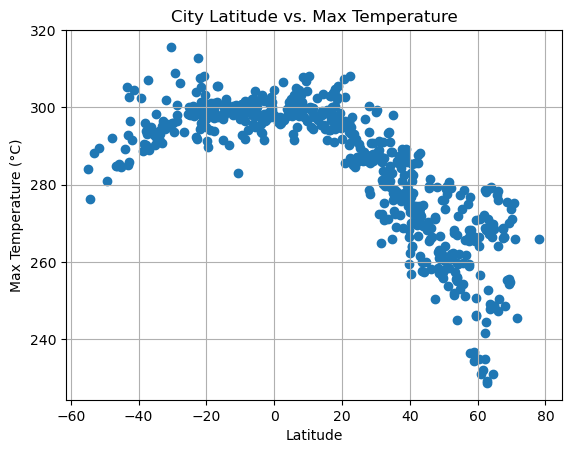

In [69]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

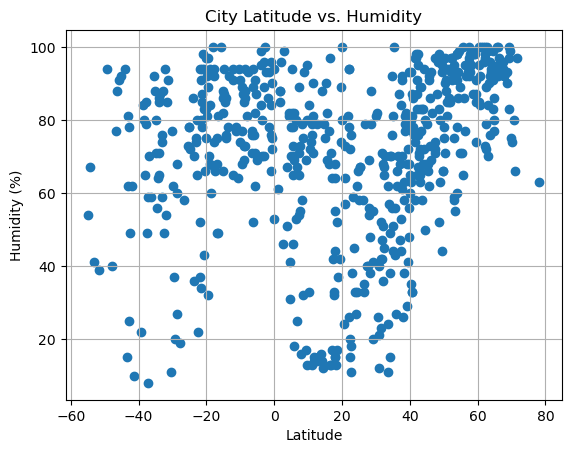

In [70]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

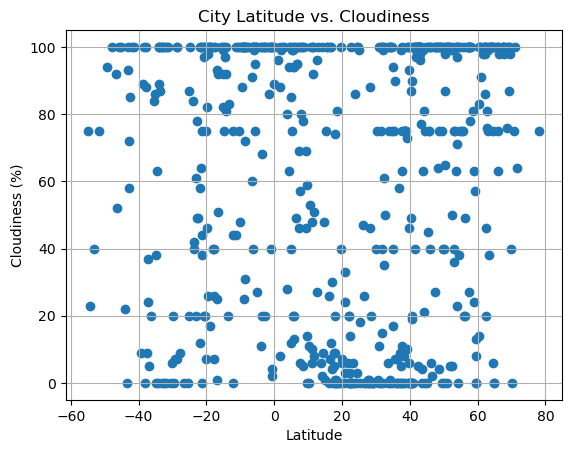

In [71]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

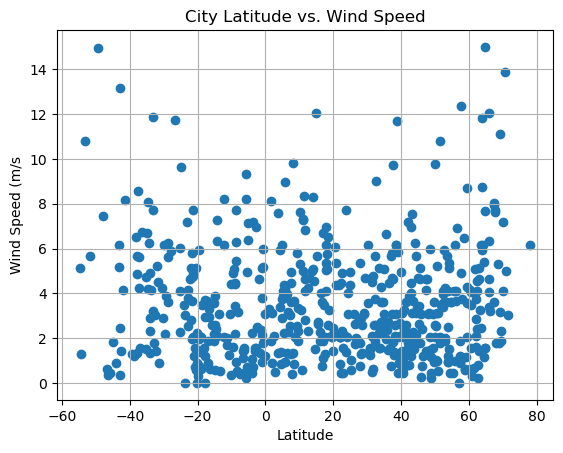

In [73]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [74]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label, line_color="red"):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR^2 = {r_value**2:.2f}"
   
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression_values, color=line_color)
    plt.annotate(line_eq, (min(x_values), max(y_values)), fontsize=15, color=line_color)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

In [75]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,245.59,97,64,3.05,RU,1739127333
1,bonthe,7.5264,-12.5050,300.37,73,6,4.45,SL,1739127334
2,stanley,54.8680,-1.6985,277.33,89,75,3.60,GB,1739127336
3,keflavik,64.0049,-22.5624,279.39,93,100,11.83,IS,1739127337
5,bestobe,52.4994,73.0975,260.79,97,50,3.57,KZ,1739127339


In [76]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,port-aux-francais,-49.3500,70.2167,280.98,94,94,14.95,TF,1739127338
9,eirunepe,-6.6603,-69.8736,302.10,77,60,1.11,BR,1739127344
11,waitangi,-43.9535,-176.5597,289.16,94,22,0.89,NZ,1739127346
12,adamstown,-25.0660,-130.1015,298.20,78,87,2.26,PN,1739127347
16,saldanha,-33.0117,17.9442,290.90,74,0,11.86,ZA,1739127351


###  Temperature vs. Latitude Linear Regression Plot

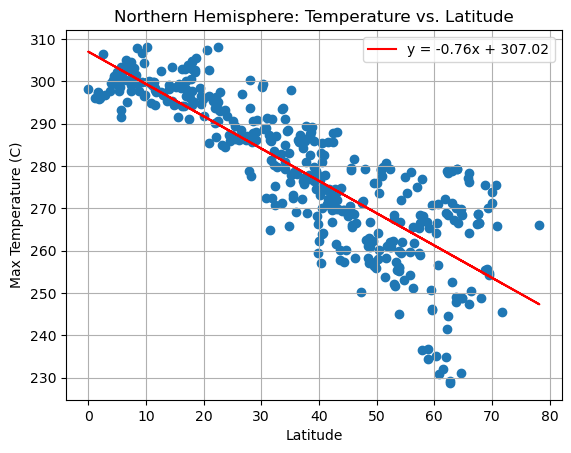

In [90]:
import matplotlib.pyplot as plt
import scipy.stats as st
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
"Northern Hemisphere: Temperature vs. Latitude",
"Latitude", "Max Temperature (C)")

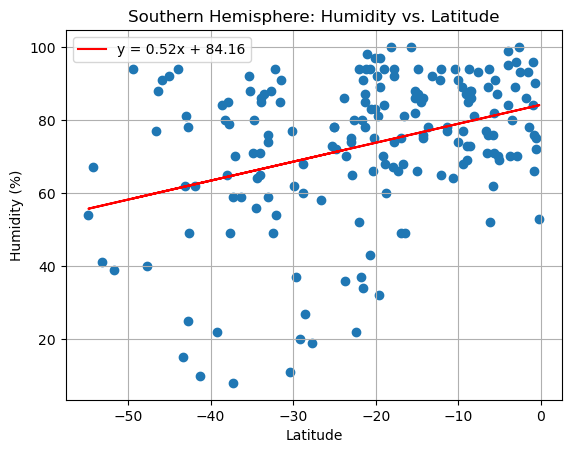

In [91]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Southern Hemisphere: Humidity vs. Latitude",
                       "Latitude", "Humidity (%)")



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

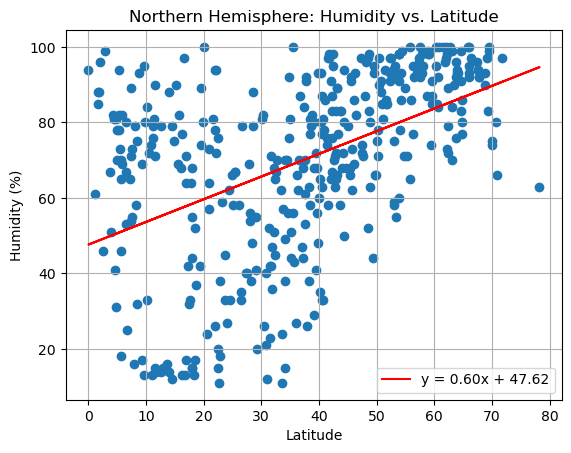

In [92]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Northern Hemisphere: Humidity vs. Latitude",
                       "Latitude", "Humidity (%)")

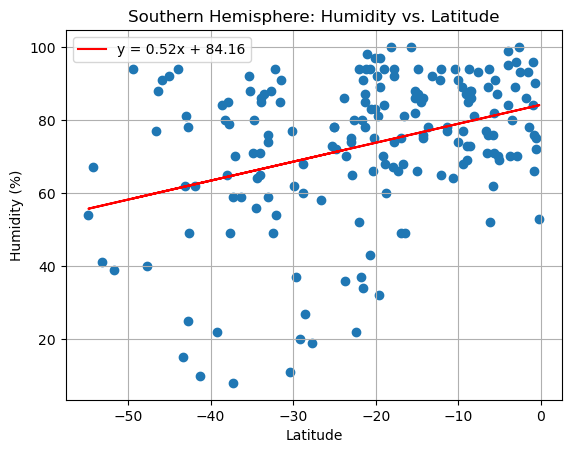

In [93]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Southern Hemisphere: Humidity vs. Latitude",
                       "Latitude", "Humidity (%)")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

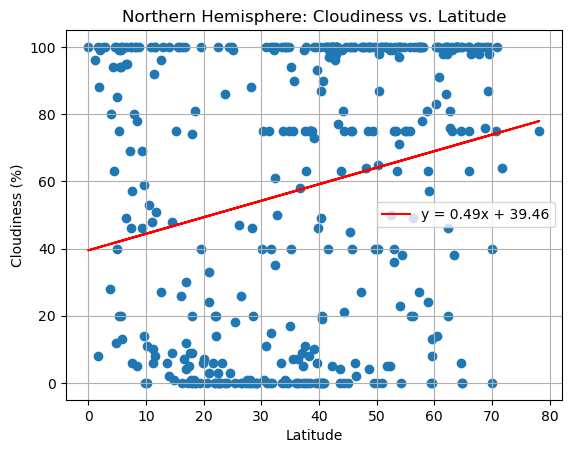

In [94]:

# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Northern Hemisphere: Cloudiness vs. Latitude",
                       "Latitude", "Cloudiness (%)")

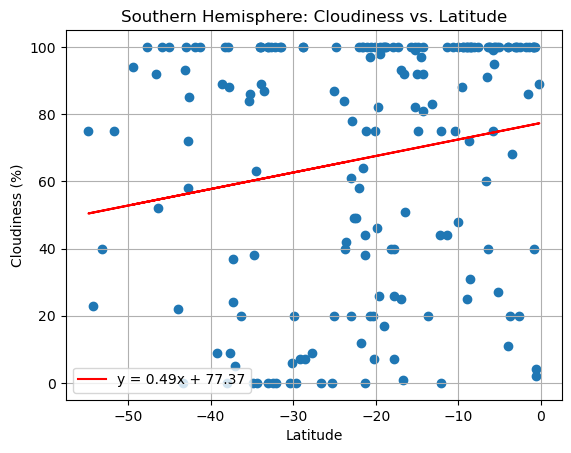

In [95]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Southern Hemisphere: Cloudiness vs. Latitude",
                       "Latitude", "Cloudiness (%)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r² value is: 0.00


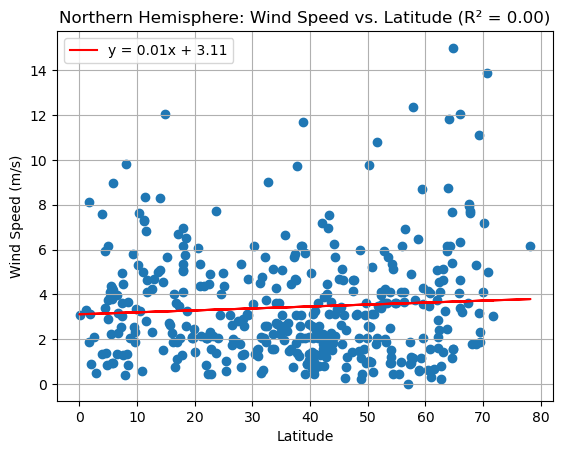

In [106]:
# Define the function to create linear regression plots with r²-value
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    r_squared = rvalue**2

    # Print the r² value
    print(f"The r² value is: {r_squared:.2f}")

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-", label=line_eq)
    plt.title(f"{title} (R² = {r_squared:.2f})")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

#Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Northern Hemisphere: Wind Speed vs. Latitude",
                       "Latitude", "Wind Speed (m/s)")



The r² value is: 0.06


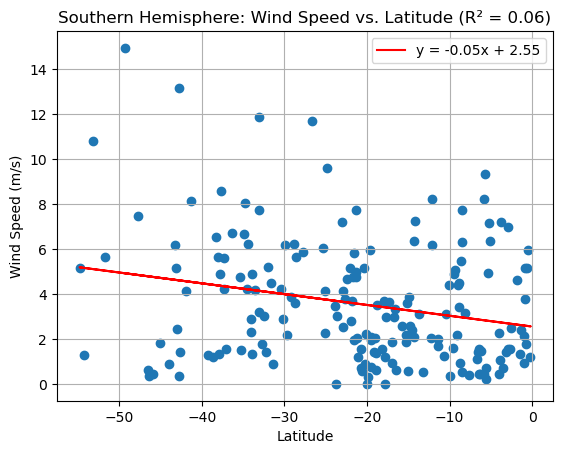

In [107]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Southern Hemisphere: Wind Speed vs. Latitude",
                       "Latitude", "Wind Speed (m/s)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE